# Figure X. Trajectory table

Imports.

In [ ]:
%load_ext autoreload
%autoreload 2
import json
import zipfile
import pandas as pd
from tqdm.auto import tqdm
from io import TextIOWrapper

dfs = []
path = '../../dgym-data/analysis/noise/selection_noise_2024-05-10_23-36-56_continued.zip'
with zipfile.ZipFile(path, 'r') as z:
    for filename in tqdm(z.namelist()):
        with z.open(filename) as file:
            with TextIOWrapper(file, encoding='utf-8') as text_file:
                result = json.load(text_file)
                df_ = pd.DataFrame(result['annotations']).reindex(
                    columns=[
                        'SMILES',
                        'Inspiration',
                        'Current Status',
                        'ABL1 pIC50',
                        'Log P',
                        'Log S',
                        'Noisy ABL1 pIC50',
                        'Noisy Log P',
                        'Noisy Log S',
                        'Step Tested',
                        'Step Scored',
                        'Synthetic Route',
                    ]
                )
                df_['sigma'] = result['sigma']
                dfs.append(df_)
df = pd.concat(dfs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/500 [00:00<?, ?it/s]

Score utility.

In [187]:
from dgym.envs.utility import MultipleUtilityFunction, ClassicUtilityFunction

# create evaluators
docking_utility_function = ClassicUtilityFunction(
    ideal=(9, 13),
    acceptable=(8, 13)
)

log_P_utility_function = ClassicUtilityFunction(
    ideal=(-0.5, 3.5),
    acceptable=(-0.5, 3.5)
)

log_S_utility_function = ClassicUtilityFunction(
    ideal=(-4, 1),
    acceptable=(-4, 1)
)

composite_utility_function = MultipleUtilityFunction(
    utility_functions = [docking_utility_function, log_P_utility_function, log_S_utility_function],
    weights = [0.8, 0.1, 0.1]
)

df['utility'] = composite_utility_function(
    df[['ABL1 pIC50', 'Log P', 'Log S']].values,
    precompute=True,
    method='average'
)

### Parse molecules

In [198]:
df

,SMILES,Inspiration,Current Status,ABL1 pIC50,Log P,Log S,Noisy ABL1 pIC50,Noisy Log P,Noisy Log S,Step Tested,Step Scored,Synthetic Route,sigma,utility
0,Cc1nc(C)n(CCC(=O)O)n1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'product': 'Cc1nc(C)n(CCC(=O)O)n1', 'reactant...",NaN,-1000.0
1,O=C(NC1(C(=O)O)CC1)c1ccccc1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'product': 'O=C(NC1(C(=O)O)CC1)c1ccccc1', 're...",NaN,-1000.0
2,CNC1(C(N)=O)CCCC1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'product': 'CNC1(C(N)=O)CCCC1', 'reactants': ...",NaN,-1000.0
3,Cc1ccc(NC(=O)c2ccco2)cc1O,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'product': 'Cc1ccc(NC(=O)c2ccco2)cc1O', 'reac...",NaN,-1000.0
4,COCC(C)N1CCN(C(C)=O)CC1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'product': 'COCC(C)N1CCN(C(C)=O)CC1', 'reacta...",NaN,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,O=C(Cc1ccc[nH]1)NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)...,NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)n1C(=O)c1cc(C(=O...,Designed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'product': 'O=C(Cc1ccc[nH]1)NCc1nn(C(=O)c2cn[...,NaN,-1000.0
3416,NCc1nn(C(=O)c2cnn(C(=O)Cc3ccc[nH]3)c2Br)c(=O)n...,NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)n1C(=O)c1cc(C(=O...,Designed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'product': 'NCc1nn(C(=O)c2cnn(C(=O)Cc3ccc[nH]...,NaN,-1000.0
3417,O=C(NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)n1C(=O)c1cc(...,NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)n1C(=O)c1cc(C(=O...,Designed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'product': 'O=C(NCc1nn(C(=O)c2cn[nH]c2Br)c(=O...,NaN,-1000.0
3418,NCc1nn(C(=O)c2cnn(C(=O)c3cncnc3)c2Br)c(=O)n1C(...,NCc1nn(C(=O)c2cn[nH]c2Br)c(=O)n1C(=O)c1cc(C(=O...,Designed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'product': 'NCc1nn(C(=O)c2cnn(C(=O)c3cncnc3)c...,NaN,-1000.0


In [189]:
import ast
import dgym
import numpy as np

current_row = df.query('utility == 1.0').iloc[0]
lineage = []
while True:
    # Parse Molecule
    best = dict(current_row)
    route = best.pop('Synthetic Route')
    
    # Normalize inputs
    if isinstance(route, str):
        route = ast.literal_eval(route)
    if isinstance(best['Inspiration'], float):
        del best['Inspiration']
    route['annotations'] = best

    # Create Molecule
    mol = dgym.molecule.Molecule.load(route)
    
    # Append Molecule
    lineage.append(mol)
    
    # Iterate to ancestor
    if not mol.inspiration:
        break

    inspiration_smiles = mol.inspiration.smiles
    current_row = df.query(
        f'SMILES == "{inspiration_smiles}"').iloc[0]

Create lineage collection.

In [190]:
import dgym as dg

lineage = dg.collection.MoleculeCollection(lineage)

### Fill out missing annotations

Load Oracles.

In [191]:
import os

def get_tcp_objectives():

    dockstring_dir = f'../../dgym-data/dockstring_targets/'
    files = os.listdir(dockstring_dir)
    configs = sorted([f for f in files if 'conf' in f])
    targets = sorted([f for f in files if 'target' in f])

    idx = 0
    with open(dockstring_dir + configs[idx], 'r') as f:
        config_ = f.readlines()
        config_ = [c.replace('\n', '') for c in config_]
        config_ = [c.split(' = ') for c in config_ if c]
        config_ = {c[0]: float(c[1]) for c in config_}

    target = targets[idx]
    name = target.split('_')[0]

    config_.update({
        'size_x': 22.5,
        'size_y': 22.5,
        'size_z': 22.5,
    })

    from dgym.envs.oracle import \
        DockingOracle, CatBoostOracle, RDKitOracle, NoisyOracle

    config = {
        'search_mode': 'detailed',
        'scoring': 'vina',
        'seed': 5,
        **config_
    }

    pIC50_oracle = DockingOracle(
        f'{name} pIC50',
        receptor_path=f'../../dgym-data//dockstring_targets/{name}_target.pdbqt',
        config=config
    )
    log_P_oracle = RDKitOracle('Log P', descriptor='MolLogP')
    log_S_oracle = CatBoostOracle(
        'Log S', path='../dgym/envs/models/aqsolcb.model')
    
    return pIC50_oracle, log_P_oracle, log_S_oracle

In [193]:
import dgym as dg
import io
from contextlib import redirect_stdout
f = io.StringIO()

with redirect_stdout(f):
    untested = lineage[lineage.annotations.isna().any(axis=1)]
    pIC50_oracle, log_P_oracle, log_S_oracle = get_tcp_objectives()
    for idx, result in enumerate(pIC50_oracle(untested, batch_size=40)):
        untested[idx]['ABL1 pIC50'] = result
    for idx, result in enumerate(log_P_oracle(untested, batch_size=40)):
        untested[idx]['Log P'] = result
    for idx, result in enumerate(log_S_oracle(untested, batch_size=40)):
        untested[idx]['Log S'] = result

In [194]:
from rdkit.Chem import Draw

def plot_aligned_molecules(molecules):
    """
    Plots a list of RDKit molecules.

    Parameters
    ----------
    molecules : list
        A list of RDKit molecule objects.
    """
    mols = [m.mol for m in molecules]
    img = Draw.MolsToGridImage(
        mols,
        subImgSize=(500, 500),
        molsPerRow=3,
    )
    return img

In [195]:
for idx, _ in enumerate(lineage):
    if idx < len(lineage) - 1:
        lineage[idx].inspiration = lineage[idx+1]

aligned_molecules = dg.utils.align_lineage(lineage[0])

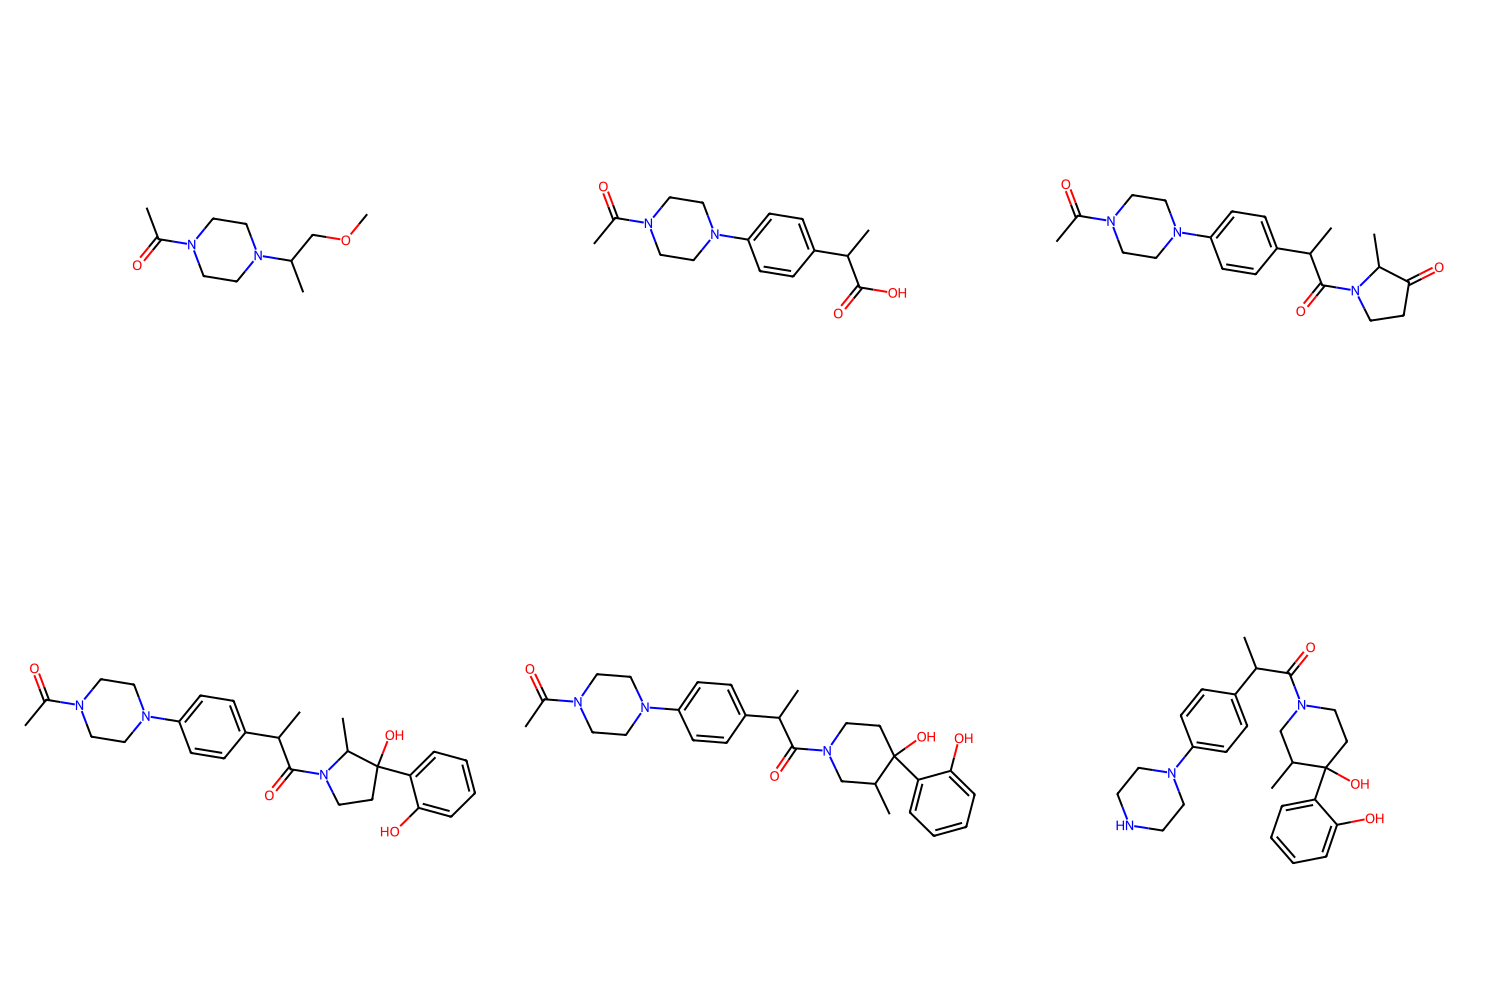

In [196]:
plot_aligned_molecules(aligned_molecules)

## Representative early-optimization molecules

In [159]:
ast.literal_eval((
    df
    .query('`Step Scored` < 1')
    .sample()[['SMILES', 'Synthetic Route']]
)['Synthetic Route'].iloc[0])

{'product': 'CC#CCC(N)C(=O)N(C(=O)C1CCC1)c1ccc(S(N)(=O)=O)cc1',
 'reaction': '13_Carboxylate_and_Amine',
 'reactants': [{'product': 'NS(=O)(=O)c1ccc(NC(=O)C2CCC2)cc1'},
  {'product': 'CC#CCC(N)C(=O)O'}]}

In [180]:
df['Step Scored'].quantile(0.90)

60.0

In [184]:
for (_, _), data in df.groupby(['sigma', 'trial']):
    # Convert step made to Progress of Series as in Novartis paper.
    data['Progress Raw'] = data['Step Scored'] / data['Step Scored'].max() * 100

KeyError: 'sigma'

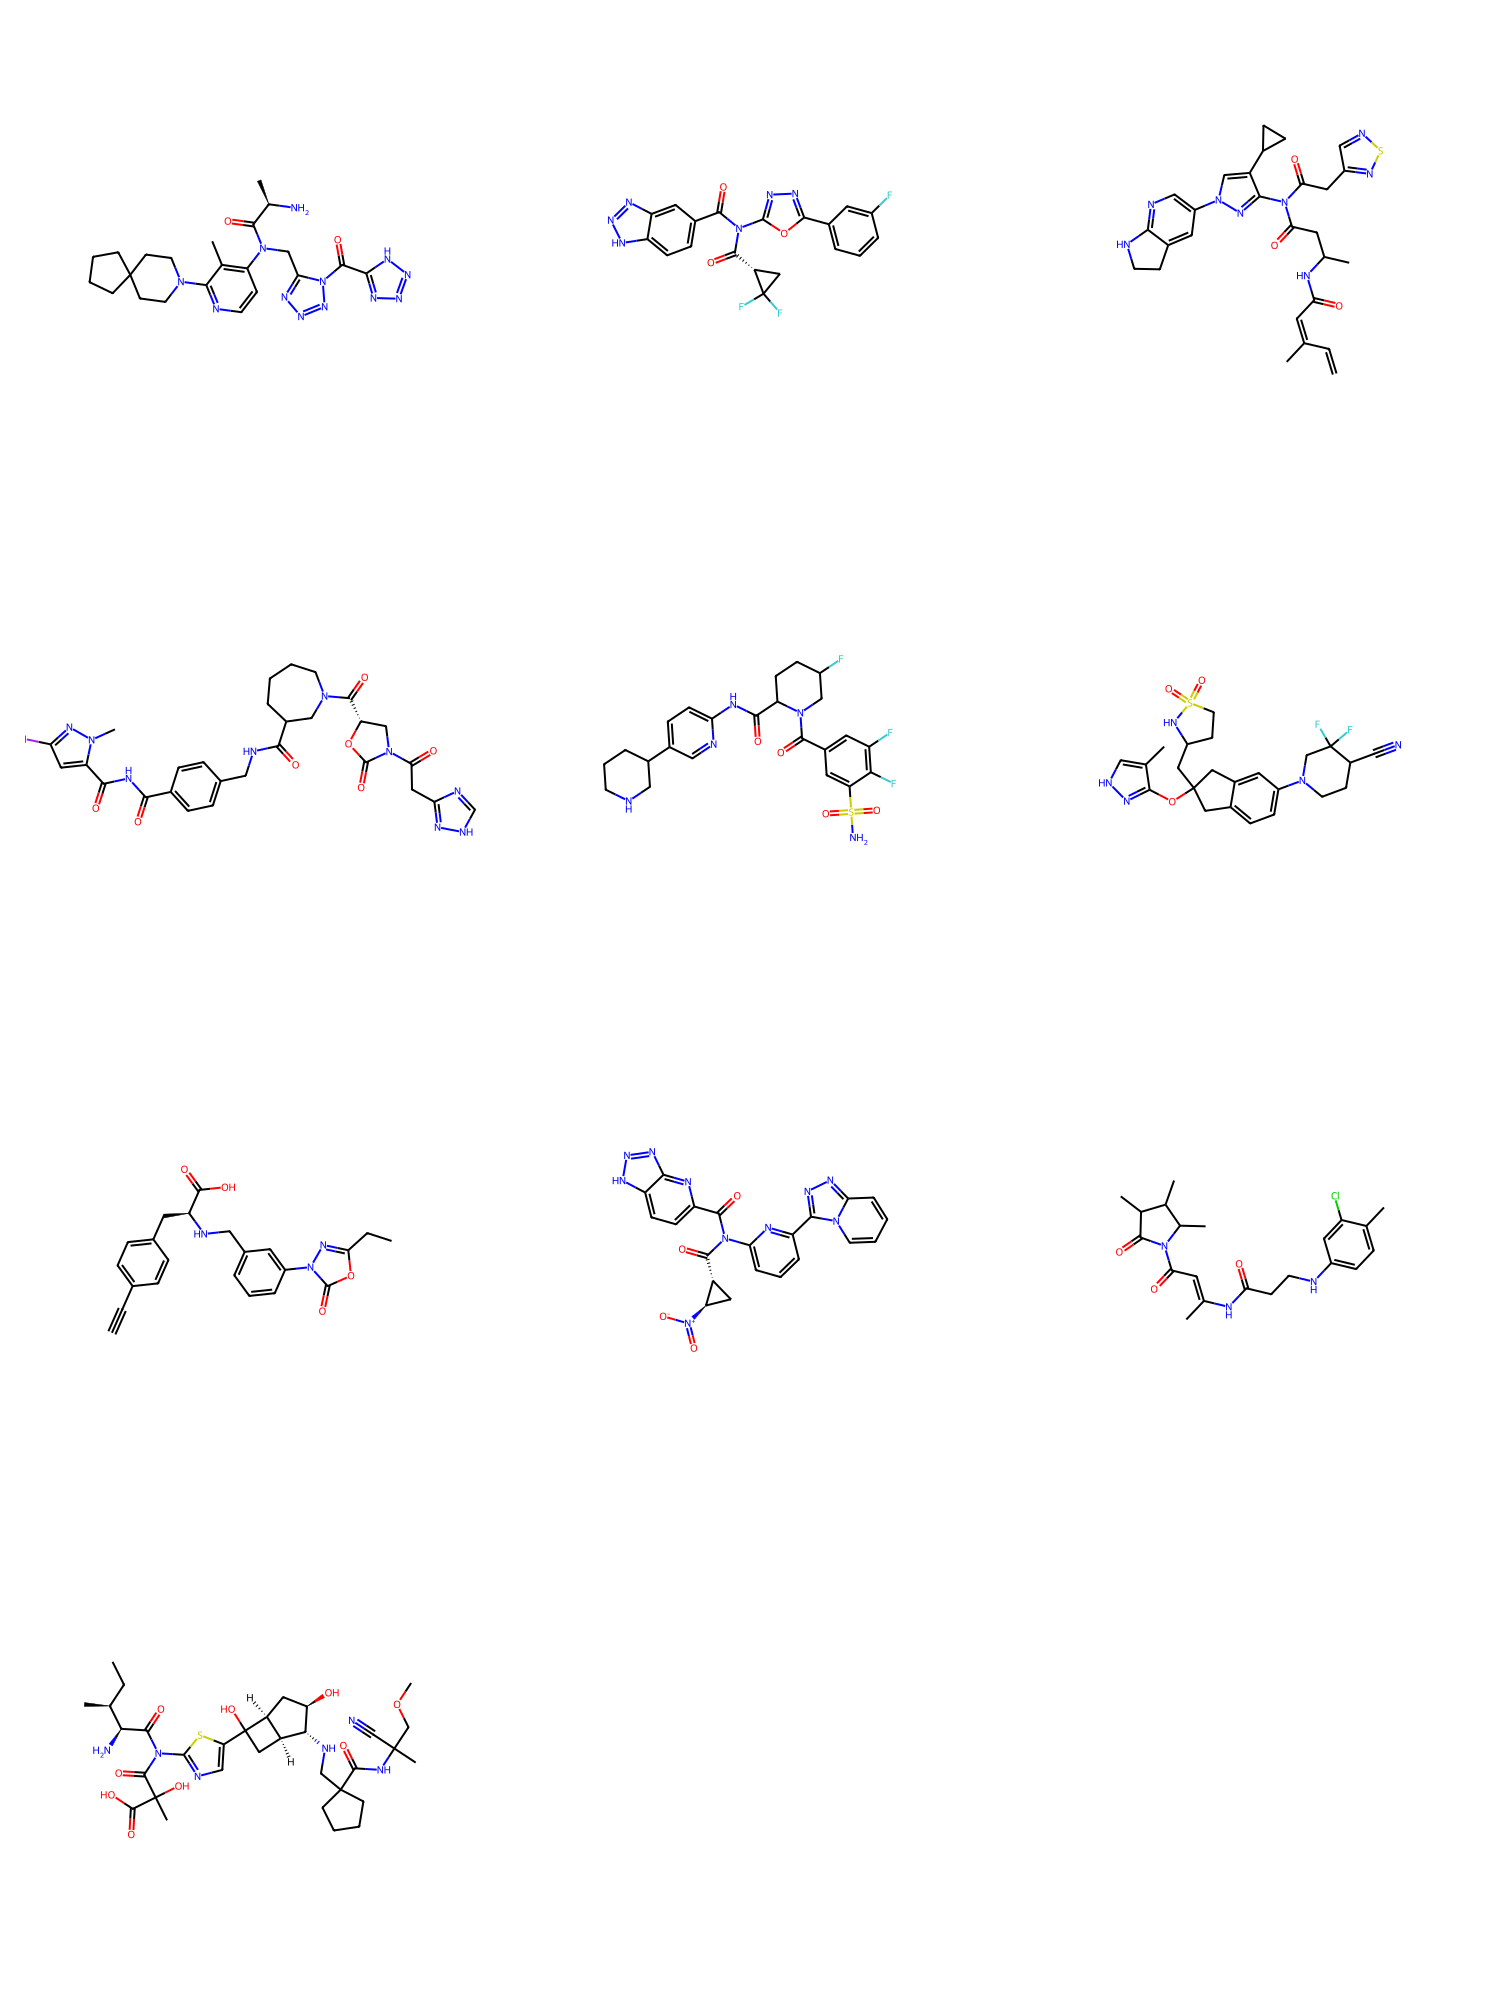

In [181]:
representative_molecules = [dg.molecule.Molecule(
    df
    .query('`Step Scored` > 60')
    .sample()['SMILES']
    .item()
) for _ in range(10)]
plot_aligned_molecules(representative_molecules)